<a href="https://colab.research.google.com/github/erikjskie/ensemblemerge_manuscript/blob/main/Supplementary_Fig11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(magrittr)
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
system("wget -x -c -nH https://s3.msi.umn.edu/skiex003/datasets/EnsembleMerge/Figure11_scores.csv")
scores = read.table(file = "skiex003/datasets/EnsembleMerge/Figure11_scores.csv", header = T, sep = ",")

system("wget -x -c -nH https://s3.msi.umn.edu/skiex003/datasets/EnsembleMerge/Figures11_weights.csv")
weights = read.table(file = "skiex003/datasets/EnsembleMerge/Figures11_weights.csv", header = T, sep = ",")
weights$method[which(weights$method == "bbknn")] = "BBKNN"

data = merge(scores, weights, by = c("method", "Datasets"))
data$datasets = factor(data$Datasets, levels = c("Dataset_1", "Dataset_2", "Dataset_4",
                                                                          "Dataset_5", "Dataset_6", "Dataset_7", "Dataset_8", "Dataset_9",
                                                                          "Dataset_10", "Dataset_11", "Dataset_12", "Dataset_13", "Dataset_14",
                                                                          "Dataset_15", "Dataset_16","Dataset_17","Dataset_18"))
                                                                          
data$Dataset = recode_factor(data$Datasets, Dataset_1 = "Villani 2017", Dataset_2 = "Han 2018", Dataset_4 = "Hemberg Panc",
                                                                          Dataset_5 = "PBMC", Dataset_6 = "293t_Jurkat", Dataset_7 = "Hemberg Retina", Dataset_8 = "Saunders 2018", Dataset_9 = "HCA Blood",
                                                                          Dataset_10 = "Paul 2015", Dataset_11 = "Human/mouse Retina", Dataset_12 = "Zilionis 2019", Dataset_13 = "Shekhar 2016", Dataset_14 = "Nestorowa 2016",
                                                                          Dataset_15 = "Zheng 2017", Dataset_16 = "Polanski 2019", Dataset_17 = "HBDC", Dataset_18 = "Panc8")
data = data[which(data$datasets != "Dataset_3"), ]
data %>% head()

,method,Datasets,score,score_method,Weight,datasets,Dataset
,<chr>,<chr>,<dbl>,<chr>,<dbl>,<fct>,<fct>
1,BBKNN,Dataset_1,0.6909722,GC,0.9997962,Dataset_1,Villani 2017
2,BBKNN,Dataset_1,0.5897443,NMI,0.9997962,Dataset_1,Villani 2017
3,BBKNN,Dataset_1,0.6762752,ASW_Cell,0.9997962,Dataset_1,Villani 2017
4,BBKNN,Dataset_1,0.5578968,ARI_Cell,0.9997962,Dataset_1,Villani 2017
5,BBKNN,Dataset_1,0.9917585,ARI_Batch,0.9997962,Dataset_1,Villani 2017
6,BBKNN,Dataset_1,0.9957746,ASW_Batch,0.9997962,Dataset_1,Villani 2017


In [6]:
write.csv(data, "Figure11.csv")

In [3]:
data = data %>% 
    group_by(Datasets, score_method) %>% 
    mutate(score_method_type = case_when(
    endsWith(score_method, "Cell") ~ "Biological",
    endsWith(score_method, "NMI") ~ "Biological",
    endsWith(score_method, "GC") ~ "Technical",
    endsWith(score_method, "Batch") ~ "Technical"
    ), per_metric_correlation = cor(score, Weight), 
    per_metric_average_score = mean(score)) %>% 
    group_by(Datasets) %>% 
    mutate(total_correlation = cor(score, Weight), total_average_score = mean(score)) %>% 
    group_by(Datasets, score_method_type) %>% 
    mutate(score_method_type_correlation = cor(score, Weight), score_method_type_average_score = mean(score))
data %>% head()

method,Datasets,score,score_method,Weight,datasets,Dataset,score_method_type,per_metric_correlation,per_metric_average_score,total_correlation,total_average_score,score_method_type_correlation,score_method_type_average_score
<chr>,<chr>,<dbl>,<chr>,<dbl>,<fct>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BBKNN,Dataset_1,0.6909722,GC,0.9997962,Dataset_1,Villani 2017,Technical,-0.5658104,0.5483218,0.1689581,0.7416785,-0.1545850,0.8440353
BBKNN,Dataset_1,0.5897443,NMI,0.9997962,Dataset_1,Villani 2017,Biological,0.9896529,0.5909042,0.1689581,0.7416785,0.8766457,0.6393217
BBKNN,Dataset_1,0.6762752,ASW_Cell,0.9997962,Dataset_1,Villani 2017,Biological,0.9610586,0.6934546,0.1689581,0.7416785,0.8766457,0.6393217
BBKNN,Dataset_1,0.5578968,ARI_Cell,0.9997962,Dataset_1,Villani 2017,Biological,0.9674582,0.6336061,0.1689581,0.7416785,0.8766457,0.6393217
BBKNN,Dataset_1,0.9917585,ARI_Batch,0.9997962,Dataset_1,Villani 2017,Technical,0.8748495,0.9918094,0.1689581,0.7416785,-0.1545850,0.8440353
BBKNN,Dataset_1,0.9957746,ASW_Batch,0.9997962,Dataset_1,Villani 2017,Technical,0.9282066,0.9919747,0.1689581,0.7416785,-0.1545850,0.8440353


Adding missing grouping variables: `Datasets`



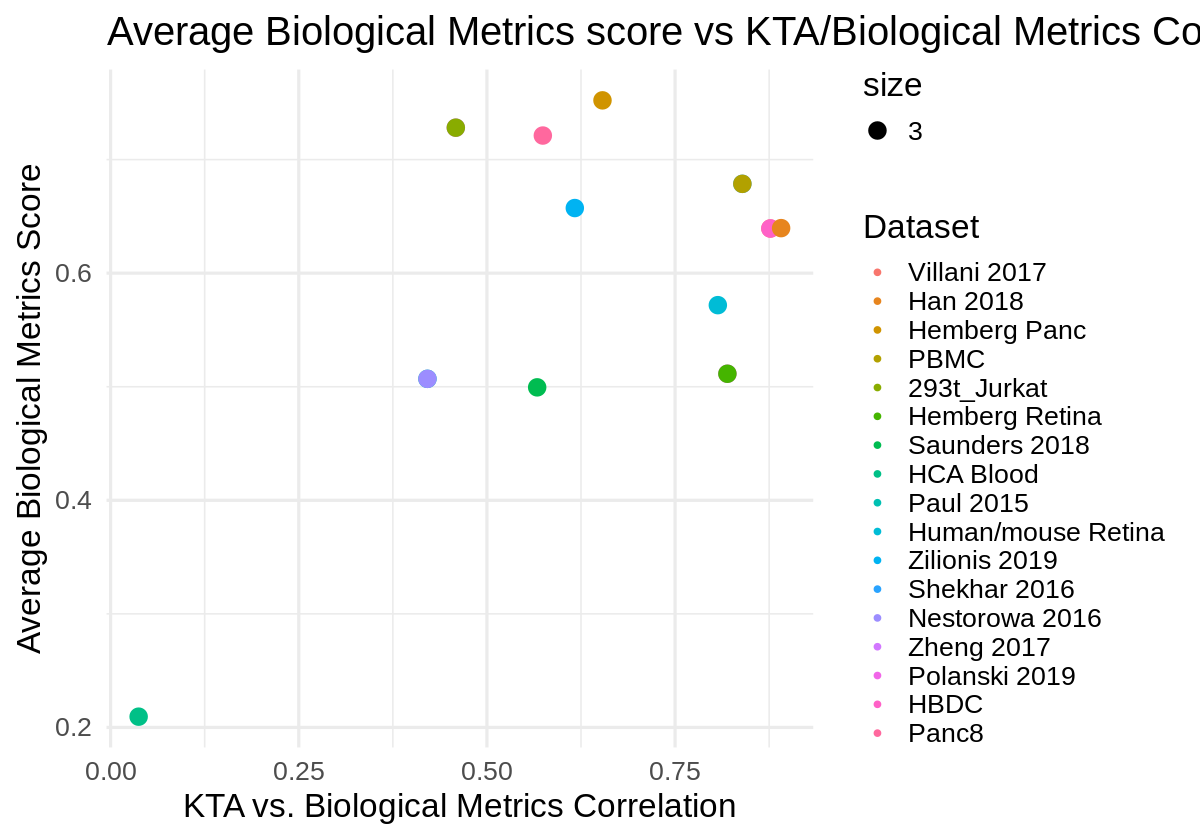

In [4]:
options(repr.plot.width = 10, repr.plot.height = 7)
data %>% select(Dataset, score_method_type_correlation, score_method_type, score_method_type_average_score) %>% filter(score_method_type == "Biological") %>% distinct() %>% ggplot(aes(x=score_method_type_correlation, y=score_method_type_average_score, color = Dataset, size=3)) + geom_point() + ylab("Average Biological Metrics Score") + xlab("KTA vs. Biological Metrics Correlation") + ggtitle("Average Biological Metrics score vs KTA/Biological Metrics Correlation") +
    theme_minimal(base_size=20)

In [5]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ggplot2_3.3.5  dplyr_1.0.7    magrittr_2.0.1

loaded via a namespace (and not attached):
 [1] pillar_1.6.4     compiler_4.1.2   base64enc_0.1-3  tools_4.1.2     
 [5] digest_0.6.29    uuid_1.0-3       jsonlite_1.7.2   evaluate_0.14   
 [9] lifecycle_1.0.1  tibble_3.